# Fresh take

## 1. Initalize sites

In [1]:
%load_ext autoreload
import os
import os
import shutil
import dbPipeline
import time
from parseFiles.helperFunctions.loadDict import loadDict

In [6]:
data_dump = r'U:\data-dump'
data_dump = 'example_data'

In [10]:
%autoreload 2
projectPath = os.path.join(os.getcwd(),'test')
try:
    shutil.rmtree(projectPath)
except:
    pass
db = dbPipeline.database(projectPath=projectPath,verbose=False,enableParallel=True)
Sites = loadDict(r'example_data\projectInventory_Template.yml')
# print(Sites)

db.projectInventory(newSites=Sites)

template = loadDict(r'example_data\source_Template.yml')

# print(template)

siteID,measurementID = 'SCL','Flux'

dpath = r'SCL\2024\20240912'
template[siteID][measurementID]['rootPath'] = os.path.join(data_dump,dpath)
print(template[siteID][measurementID]['rootPath'])
db.rawFileSearch(siteID,measurementID,template[siteID][measurementID])

Creating template project inventory
None
None
W135 15.1144
parseCoordinates(ID='SCL', latitude=69.2264167, longitude=-135.2519067)
W134 52 51.92
parseCoordinates(ID='FIL', latitude=69.3722778, longitude=-134.8810889)
example_data\SCL\2024\20240912
2024-01-01 00:30:00    1.704069e+09
2024-01-01 01:00:00    1.704071e+09
2024-01-01 01:30:00    1.704073e+09
2024-01-01 02:00:00    1.704074e+09
2024-01-01 02:30:00    1.704076e+09
                           ...     
2024-12-31 22:00:00    1.735682e+09
2024-12-31 22:30:00    1.735684e+09
2024-12-31 23:00:00    1.735686e+09
2024-12-31 23:30:00    1.735688e+09
2025-01-01 00:00:00    1.735690e+09
Freq: 30min, Name: POSIX_timestamp, Length: 17568, dtype: float64
Writing: c:\Users\jskeeter\gsc-permafrost\EC_dataPipeline\test\database\SCL\Flux\2024\POSIX_timestamp
Writing: c:\Users\jskeeter\gsc-permafrost\EC_dataPipeline\test\database\SCL\Flux\2024\nanoseconds_mean
Writing: c:\Users\jskeeter\gsc-permafrost\EC_dataPipeline\test\database\SCL\Flux\2024

In [11]:
%autoreload 2

df = dbPipeline.databaseFolder(path=r'C:\Users\jskeeter\gsc-permafrost\EC_dataPipeline\test\database\SCL\Flux',Years=[2024])
df.dataOut.columns

Index(['CH4_density_mean', 'CH4_mole_fraction_mean', 'CO2_mean',
       'Diagnostic_7700_mean', 'Diagnostic_CSAT_mean', 'H2O_mean',
       'LI7500_diag_mean', 'LI7550_SignalStrength_mean', 'nanoseconds_mean',
       'POSIX_timestamp', 'Pressure_mean', 'press_mean', 'RSSI_mean',
       'seconds_mean', 'Temperature_mean', 'Ts_mean', 'Ux_mean', 'Uy_mean',
       'Uz_mean'],
      dtype='object')

<Axes: xlabel='UTC'>

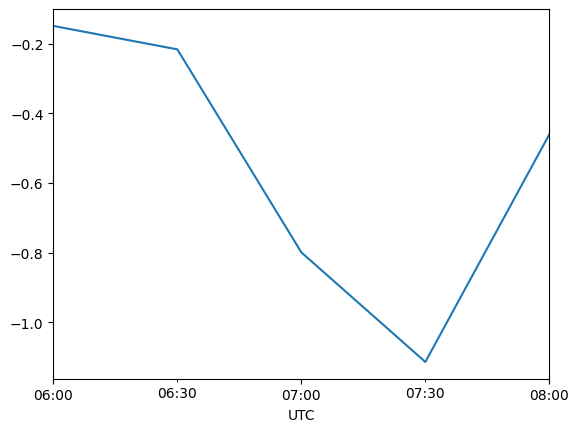

In [13]:
df.dataOut['CH4_density_mean'].dropna().plot()#.to_csv(r'C:\Users\jskeeter\OneDrive - NRCan RNCan\Documents\Presentations\CANCH4\Data\SCL_met.csv')

In [ ]:
from parseFiles.helperFunctions.loadDict import loadDict
# importlib.reload(dbPipeline)

# db = dbPipeline.database(projectPath=projectPath,verbose=False,enableParallel=False)
template = loadDict(r'example_data\source_Template.yml')
# # sourcePath = r'U:\EC_Backup\SCL_2024\20240724'
sourcePath = r'example_data'
print(template)
for siteID in template:
    for measurementID in template[siteID]:
        db.rawFileSearch(siteID,measurementID,template[siteID][measurementID])